<a href="https://colab.research.google.com/github/anushasr-DS/Anusha_Self-intro-and-Project_Flow/blob/main/ML_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
#text dataset into lables

In [3]:
df=pd.read_csv("/content/tips.csv")

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})


In [8]:
print(df)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    3     1     2
1         10.34  1.66    1       0    3     1     3
2         21.01  3.50    1       0    3     1     3
3         23.68  3.31    1       0    3     1     2
4         24.59  3.61    0       0    3     1     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    2     1     3
240       27.18  2.00    0       1    2     1     2
241       22.67  2.00    1       1    2     1     2
242       17.82  1.75    1       0    2     1     2
243       18.78  3.00    0       0    0     1     2

[244 rows x 7 columns]


In [ ]:
#Elbow method to find the optimal number of cluster

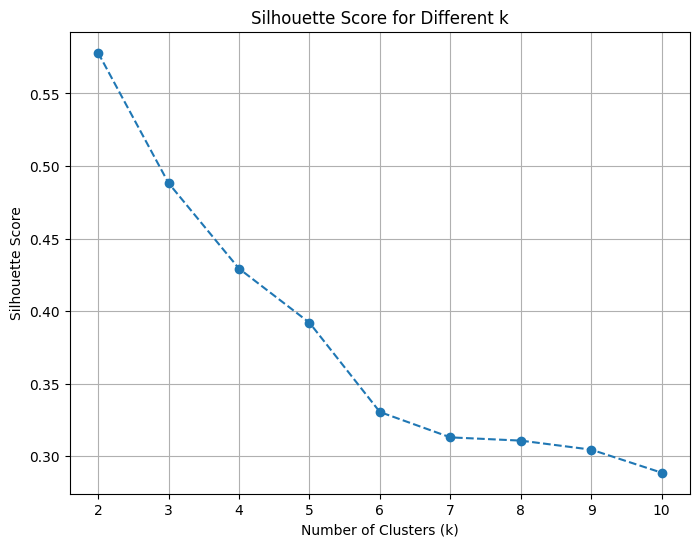

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    score = silhouette_score(df, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


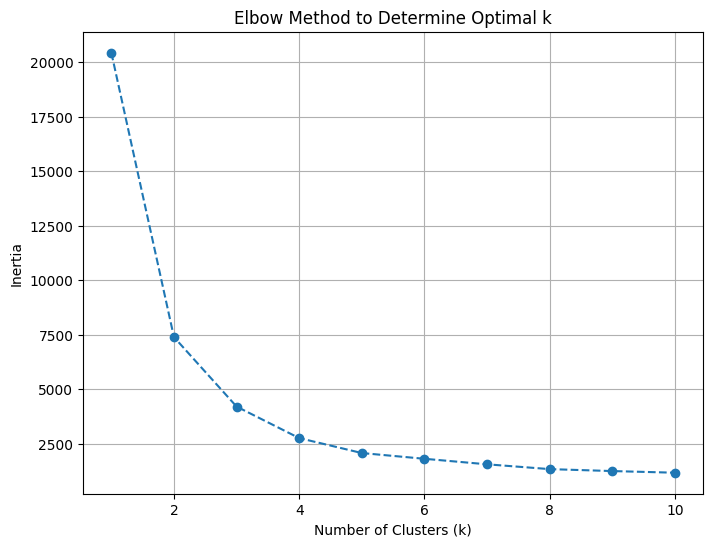

In [14]:
from sklearn.cluster import KMeans
inertia=[]
k_values = range(1,11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)

#plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [15]:
from sklearn.cluster import KMeans
optimal_k = 3
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
kmeans.fit(df)
df['cluster']=kmeans.labels_
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

Centroids:
[[24.01066667  3.5476      0.69333333  0.38666667  1.94666667  0.82666667
   2.96      ]
 [13.84780142  2.35134752  0.58865248  0.35460993  1.54609929  0.64539007
   2.17021277]
 [38.3725      4.78464286  0.78571429  0.5         2.03571429  0.82142857
   3.53571429]]


In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,cluster
0,16.99,1.01,0,0,3,1,2,1
1,10.34,1.66,1,0,3,1,3,1
2,21.01,3.50,1,0,3,1,3,0
3,23.68,3.31,1,0,3,1,2,0
4,24.59,3.61,0,0,3,1,4,0


In [17]:
c1=df[df['cluster']==0]
c2=df[df['cluster']==1]
c3=df[df['cluster']==2]

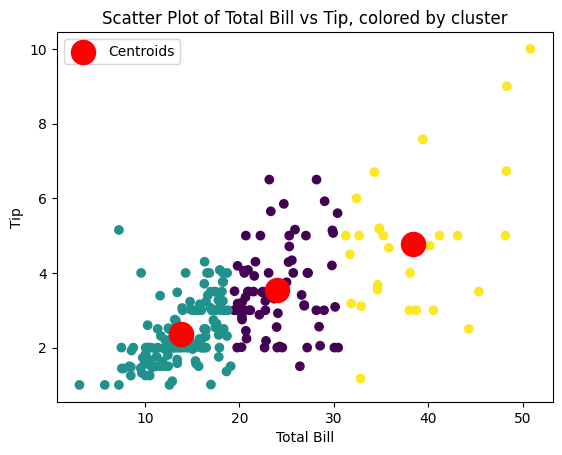

In [18]:
plt.scatter(df['total_bill'], df['tip'], c=df['cluster'], cmap='viridis')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Scatter Plot of Total Bill vs Tip, colored by cluster")
plt.scatter(centroids[:, df.columns.get_loc('total_bill')], centroids[:, df.columns.get_loc('tip')], s=300, c='red', marker='o', label='Centroids')
plt.legend()
plt.show()